<figure>
  <IMG SRC="LogoENSEGID.png" WIDTH=125 ALIGN="right">
</figure>

# ENS1 TD HYDROGEOLOGIE

## Ecoulement permanent en nappe libre


L'équation de Darcy pour un front unitaire d'écoulement au sein d'une nappe libre s'écrit:

$q'_x = \frac{1}{2}K\left({\frac{h_1^2 - h_2^2}{L}}\right)$

avec

- $q'_x$ débit par unité de largeur d'aquifère ($L^2/T$)
- $K$ conductivité hydraulique ($L/T$)
- $h_1$ hauteur piézométrique à l'origine ($L$)
- $h_2$ hauteur piézométrique à la distance $L$ ($L$)
- $L$ longueur d'écoulement ($L$)

En combinant cette équation avec l'équation de continuité (équation qui relie la variation dans le temps d'une grandeur à sa variation dans l'espace), il est possible de développer des solutions analytiques décrivant la variation de hauteur piézométrique dans une configuration hydrogéologique particulière (ne vous impatientez pas, c'est au programme ENS2 !).\\
Ainsi, pour une nappe libre soumise à une recharge uniforme, la hauteur piézométrique le long d'un transect entre deux rivières constituant des limites hydrauliques à la nappe (cf. figure L'équation précédetne peut s'exprimer :

$h = \sqrt{h_1^2 - \frac{\left({h_1^2-h_2^2}\right)x}{L} + \frac{\omega}{K}\left({L-x}\right)x}$

avec:

- $h$ hauteur piézométrique à la distance $x$ ($L$)
- $x$ distance depuis l'origine ($L$)
- $K$ conductivité hydraulique ($L/T$)
- $h_1$ hauteur piézométrique à l'origine ($L$)
- $h_2$ hauteur piézométrique à la distance $L$ ($L$)
- $L$ longueur d'écoulement ($L$)
- $\omega$ taux de recharge ($L/T$)


<figure>
  <IMG SRC="2d_recharge.png" WIDTH=525 ALIGN="center">
</figure>

Un canal est construit parallèlement à une rivière, à une distance latérale de 1500 mètres selon un axe Est/Ouest, la rivière étant située à l'Est. Les deux pénètrent totalement un aquifère sableux de conductivité hydraulique K = 1.8 m/jour. La zone est soumise à une précipitation brute de 0.8 m/ans et une évapotranspiration couplée au ruissellement de 0.5 m/an. La hauteur piézométrique dans la rivière est 31 mètres. La hauteur piézométrique du canal est 27 mètres.

A l'aide d'un modèle d'après les équations précédentes, calculer le profil piézométrique obtenu. Commenter le profil par rapport au profil obtenu en l'absence de recharge. Quel élément nouveau apparaît et par quoi cela se traduit il en terme hydrodynamique?

In [1]:
# EXERCICE NAPPE LIBRE SOUMISE A RECHARGE

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate as intg

In [2]:
# données globales
K = 1.8 #m/j
hriv = 31 #mNG
hcan = 27 #mNG
L = 100 #m
x = np.arange(1,L,1)

In [9]:
# fonction profil piézométrique recharge efficace N
def piezo(x,N):
    return np.sqrt(hriv **2 - ((hriv ** 2 - hcan ** 2)/(L)) * x + N/K* (L-x)*x)

#fonction topographie (pente A = 0.001 et Z=35 à x=300 ==> B = 34.7)
def topo(x):
    return 0.001 * x + 31.7

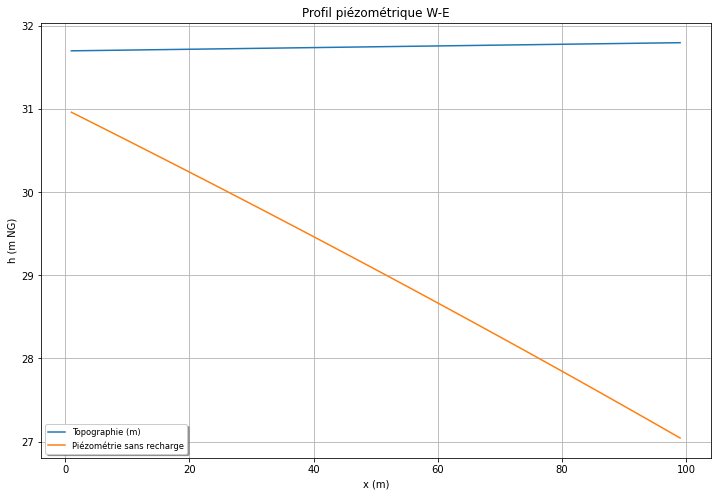

30.9625580338576


In [11]:
#topographie
topo1 = topo(x)

# profil piézométrique sans recharge
hsec = piezo(x,0)

# profil piézométrique avec recharge
Pbrut = 0.8 #m/an
Pevap = 0.8 #m/an
N = (Pbrut-Pevap)/365 #m /jour
hrech = piezo(x,N)

# representation graphique
plt.figure(figsize=(12,8))
plt.title('Profil piézométrique W-E')
plt.xlabel('x (m)')
plt.ylabel('h (m NG)')
plt.grid()
plt.plot(x,topo1,label='Topographie (m)')
plt.plot(x,hsec,label='Piézométrie sans recharge')
#plt.plot(x,hrech,label='Piézométrie avec recharge standard')
legend = plt.legend(loc='best', shadow=True, fontsize='small')
plt.show()

print(max(hrech))

la valeur de precipitation brute d'inondation est 0.9596640000026808 mètre par an
les cotes de débordement de la nappe sont x1= 587 m et x2= 588 m


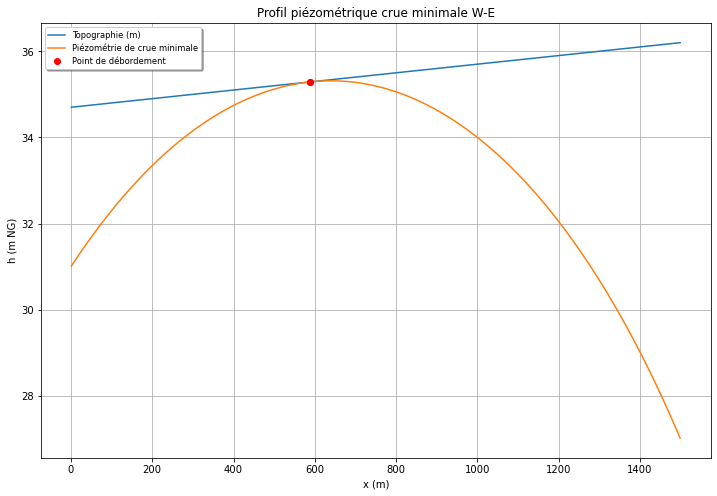

In [19]:
# etude de la crue: precipitation d'apparition du débordement

debord1=np.array([])
N=0.2/365
htest=piezo(x,N)
#determination du max de H
while debord1.size == 0 :
    N = N+(0.000001/365) #l'increment influence la precision mais aussi le temps de calcul
    htest=piezo(x,N)
    debord1 = np.argwhere(np.diff(np.sign(htest - topo1))).flatten()
print("la valeur de precipitation brute d'inondation est", (N*365)+Pevap,"mètre par an")
print("les cotes de débordement de la nappe sont x1=",debord1[0],"m et x2=",debord1[1],"m")
plt.figure(figsize=(12,8))
plt.title('Profil piézométrique crue minimale W-E')
plt.xlabel('x (m)')
plt.ylabel('h (m NG)')
plt.grid()
plt.plot(x,topo1,label='Topographie (m)')
plt.plot(x,htest,label='Piézométrie de crue minimale')
plt.plot(x[debord1], htest[debord1], 'ro',label='Point de débordement')
legend = plt.legend(loc='best', shadow=True, fontsize='small')
plt.show()


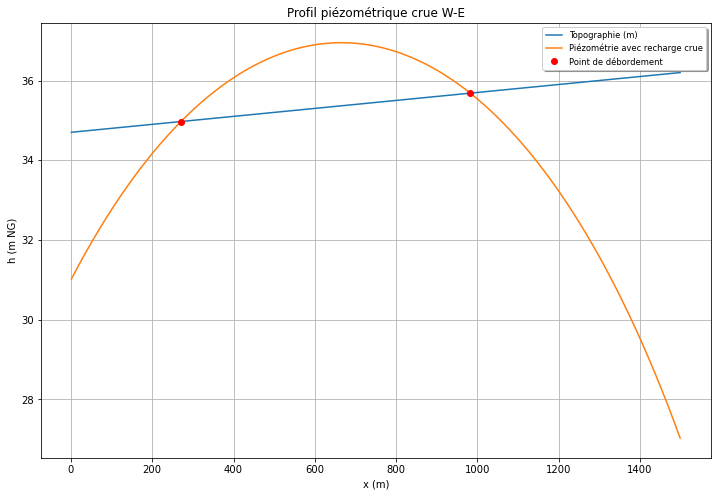

les cotes de débordement de la nappe sont x1= 269 m et x2= 981 m
le volume unitaire de crue par mètre de front de nappe est 764.9199719214921 m3/m


In [13]:
# volume inondation pour pluie exceptionnelle

Pcrue = 1.1 #m/an
Pevap = 0.5 #m/an
Ncrue = (Pcrue-Pevap)/365 #m /jour

# modification de la fonction piezo pour bloquer la recharge sur la valeur de crue
# et pouvoir utiliser l'integration numérique (il doit y avoir un pmoyen plus élégant !)
def piezcrue(x):
    return np.sqrt(hriv **2 - ((hriv ** 2 - hcan ** 2)/(L)) * x + Ncrue/K* (L-x)*x)

hcrue = piezcrue(x)

#First it calculates piezo - topo and the corresponding signs using np.sign. Applying np.diff reveals all the positions, where the sign changes (e.g. the lines cross). Using np.argwhere gives us the exact indices.
debord = np.argwhere(np.diff(np.sign(hcrue - topo1))).flatten()

volh = intg.quad(piezcrue,debord[0],debord[1])
voltopo = intg.quad(topo,debord[0],debord[1])
volcrue = volh[0] - voltopo[0]

plt.figure(figsize=(12,8))
plt.title('Profil piézométrique crue W-E')
plt.xlabel('x (m)')
plt.ylabel('h (m NG)')
plt.grid()
plt.plot(x,topo1,label='Topographie (m)')
plt.plot(x,hcrue,label='Piézométrie avec recharge crue')
plt.plot(x[debord], hcrue[debord], 'ro',label='Point de débordement')
legend = plt.legend(loc='best', shadow=True, fontsize='small')
plt.show()

print("les cotes de débordement de la nappe sont x1=",debord[0],"m et x2=",debord[1],"m")
print("le volume unitaire de crue par mètre de front de nappe est", volcrue,"m3/m")
